In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, precision_recall_curve, accuracy_score,auc
from scipy.stats import ttest_ind

In [17]:
metadata = pd.read_csv("metadata.csv",header=0,index_col=0)
microbiome = pd.read_csv("microbiome.csv",header=0,index_col=0)
metabolome = pd.read_csv("serum_lipo.csv",header=0,index_col=0)

In [18]:
diseases_to_categories = {'Metabolic_Syndrome':['1'],'Type_2_Diabetes':['3'],'Coronary_Artery_Disease':['4','5','6'],'Severe_Obesity':['2a','2b'],'Heart_Failure':['6','7'],'Healthy':['8']}

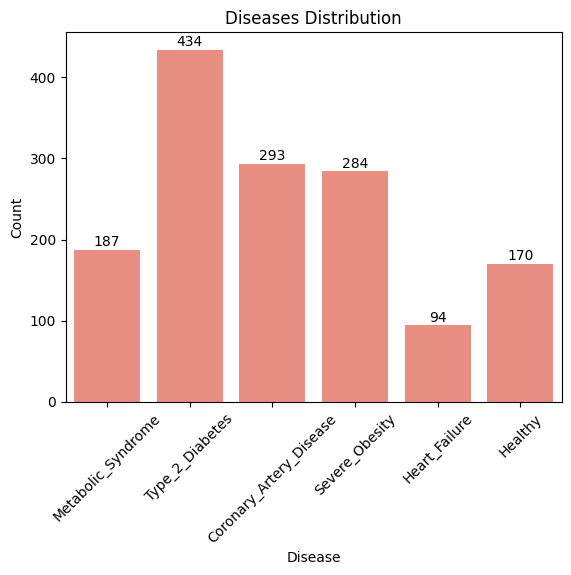

In [19]:
diseases_counts = {}
for disease in diseases_to_categories.keys():
    diseases_counts[disease]= metadata[metadata['PATGROUPFINAL_C'].isin(diseases_to_categories[disease])].shape[0]
df = pd.DataFrame(list(diseases_counts.items()), columns=['Disease', 'Count'])
plt.rcParams.update({'font.size':10})
ax = sns.barplot(data=df, x='Disease', y='Count', color='salmon')
plt.xticks(rotation=45)
plt.title('Diseases Distribution')
plt.xlabel('Disease')
plt.ylabel('Count')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.show()

In [20]:
metabolome.shape

(1383, 105)

In [21]:
microbiome_train ,microbiome_test, train_diseases, test_diseases = train_test_split(microbiome, metadata[['PATGROUPFINAL_C']], train_size=0.8)
train_idx = microbiome_train.index
test_idx  = microbiome_test.index
metabolome_train = metabolome.loc[train_idx]
metabolome_test  = metabolome.loc[test_idx]
metadata_train = metadata.loc[train_idx]
metadata_test = metadata.loc[test_idx]
metabolome_and_diseases_train = pd.merge(metabolome_train, metadata[['PATGROUPFINAL_C']], left_index=True, right_index=True, how='inner')
metabolome_and_diseases_train

,H1A1,H1A2,H1CH,H1FC,H1PL,H1TG,H2A1,H2A2,H2CH,H2FC,...,V6CH,V6FC,V6PL,V6TG,VLAB,VLCH,VLFC,VLPL,VLTG,PATGROUPFINAL_C
SampleID,,,,,,,,,,,,,,,,,,,,,
x12MCx1353,3.391259,0.104540,3.243416,1.483758,5.097037,2.027529,10.886761,0.808838,3.852488,0.626818,...,0.076219,0.094640,0.248719,0.000000,5.277850,13.121469,7.246297,15.270013,53.916437,5
x10MCx2417,14.291633,0.905917,8.303998,3.060419,11.325992,3.029380,18.101251,1.924699,6.924920,1.406376,...,0.108415,0.097990,0.258470,1.115020,5.486623,17.110169,8.431054,15.400172,60.169128,2b
x20MCx1716,6.830082,1.585577,8.927401,3.022623,10.404638,2.032370,17.978763,2.550645,7.374403,1.945718,...,0.113705,0.111297,0.292777,2.095044,8.173357,28.041147,12.690249,26.285291,113.411889,2b
x30MCx1235,5.634679,1.537220,9.737685,3.512077,11.299963,1.284477,13.033325,2.015697,6.067339,1.705879,...,0.116074,0.106475,0.280952,1.607388,7.204223,24.594128,11.683721,25.211325,91.537063,1
x10MCx2014,0.000000,0.000000,0.000000,0.000000,0.000000,1.134467,9.813166,0.509063,2.891231,0.234556,...,0.052941,0.092167,0.242523,0.000000,5.487313,12.233048,6.646338,14.249877,51.057331,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x30MCx2128,5.335137,0.820632,5.964847,2.958511,6.863356,1.914185,12.861300,2.216148,5.380776,1.517975,...,0.117865,0.094695,0.248794,1.875700,3.376538,6.993308,4.094805,9.735381,27.211351,6
x30MCx2951,18.137009,3.466744,11.791801,5.429259,16.615256,2.895630,20.475447,4.791790,8.696725,3.100387,...,0.153874,0.117469,0.309583,2.921258,10.537014,40.926053,16.646437,35.013594,132.979113,3
x10MCx1272,25.562189,3.766109,14.019894,4.577229,20.075809,4.649163,22.535256,5.646005,9.019218,2.856221,...,0.143676,0.113079,0.297440,3.323798,8.663304,34.328797,13.011435,27.125499,110.902410,2a


In [22]:
# correlations
correlation_metabolome_microbiome = {'Metabolite':[]}
for bacteria in microbiome_train.columns:
    correlation_metabolome_microbiome[bacteria] = []
for metabolite in metabolome_train.columns:
        correlation_metabolome_microbiome['Metabolite'].append(metabolite)
        for bacteria in microbiome_train.columns:
            correlation_metabolome_microbiome[bacteria].append(np.round(metabolome_train[metabolite].corr(microbiome_train[bacteria]), decimals=4))
correlation_metabolome_microbiome = pd.DataFrame(correlation_metabolome_microbiome).set_index('Metabolite')

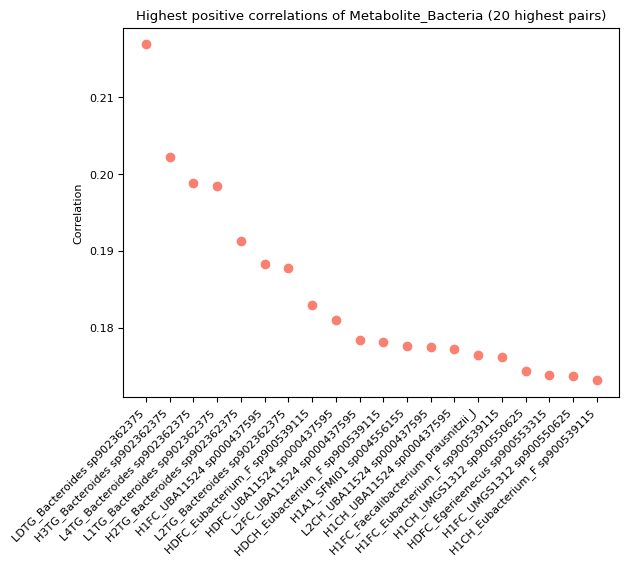

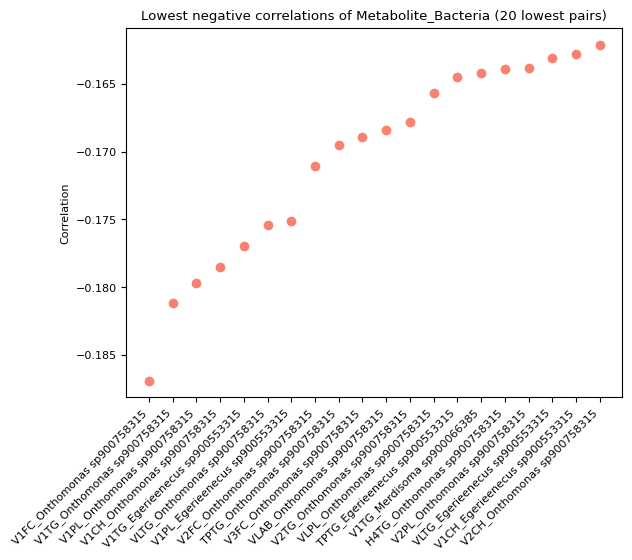

In [23]:
stacked_corrs = correlation_metabolome_microbiome.unstack()
df1 = stacked_corrs.nlargest(20).reset_index()
df2 = stacked_corrs.nsmallest(20).reset_index()
df1.columns = ['Bacteria', 'Metabolite', 'Corr']
df2.columns = ['Bacteria', 'Metabolite', 'Corr']
df1['Metabolite_Bacteria'] = df1['Metabolite'].astype(str) + '_' + df1['Bacteria'].astype(str)
df2['Metabolite_Bacteria'] = df2['Metabolite'].astype(str) + '_' + df2['Bacteria'].astype(str)
plt.rcParams.update({'font.size': 8})
plt.scatter(x=df1['Metabolite_Bacteria'],y=df1['Corr'],color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title("Highest positive correlations of Metabolite_Bacteria (20 highest pairs)")
plt.ylabel('Correlation')
plt.show()
plt.scatter(x=df2['Metabolite_Bacteria'],y=df2['Corr'],color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title("Lowest negative correlations of Metabolite_Bacteria (20 lowest pairs)")
plt.ylabel('Correlation')
plt.show()

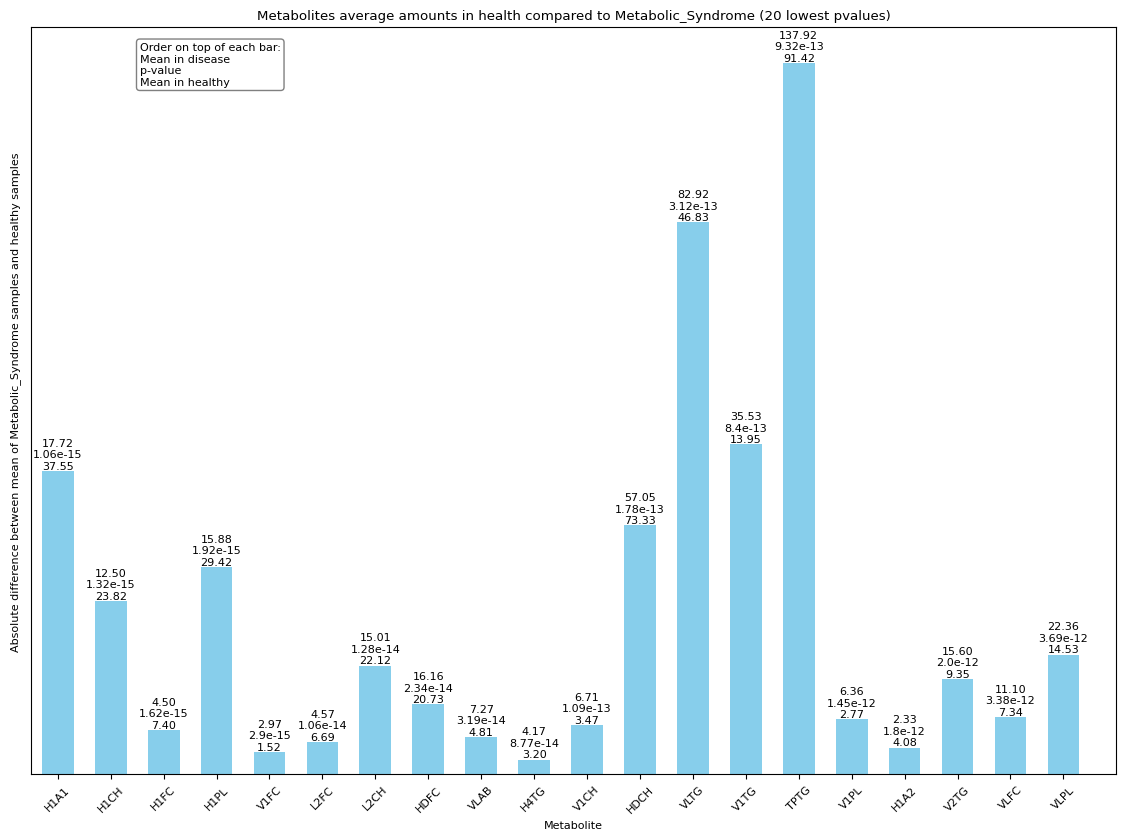

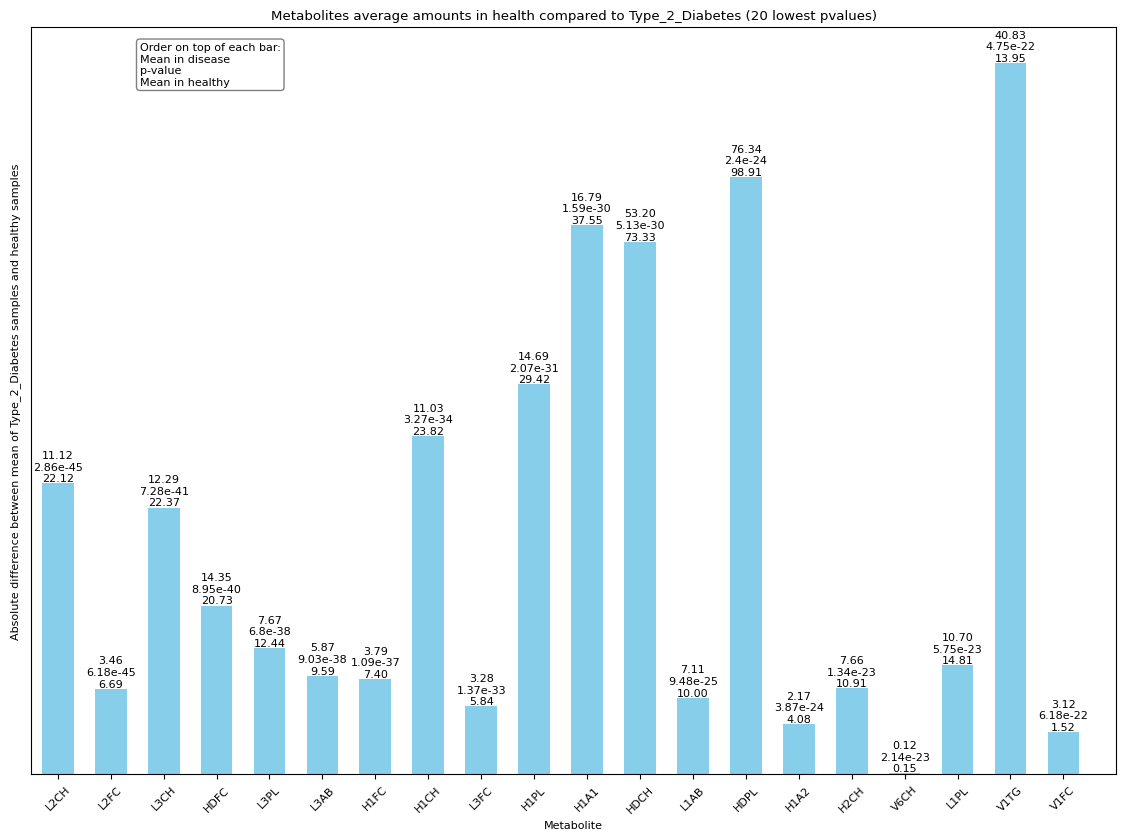

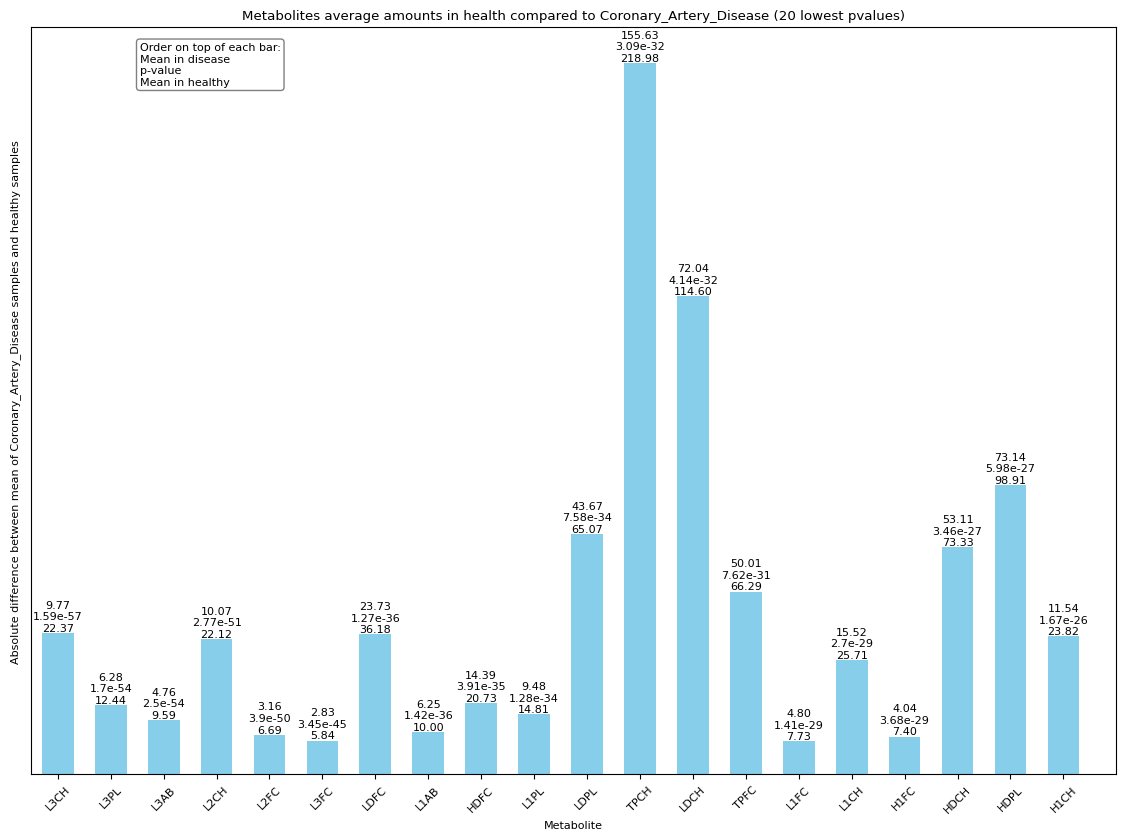

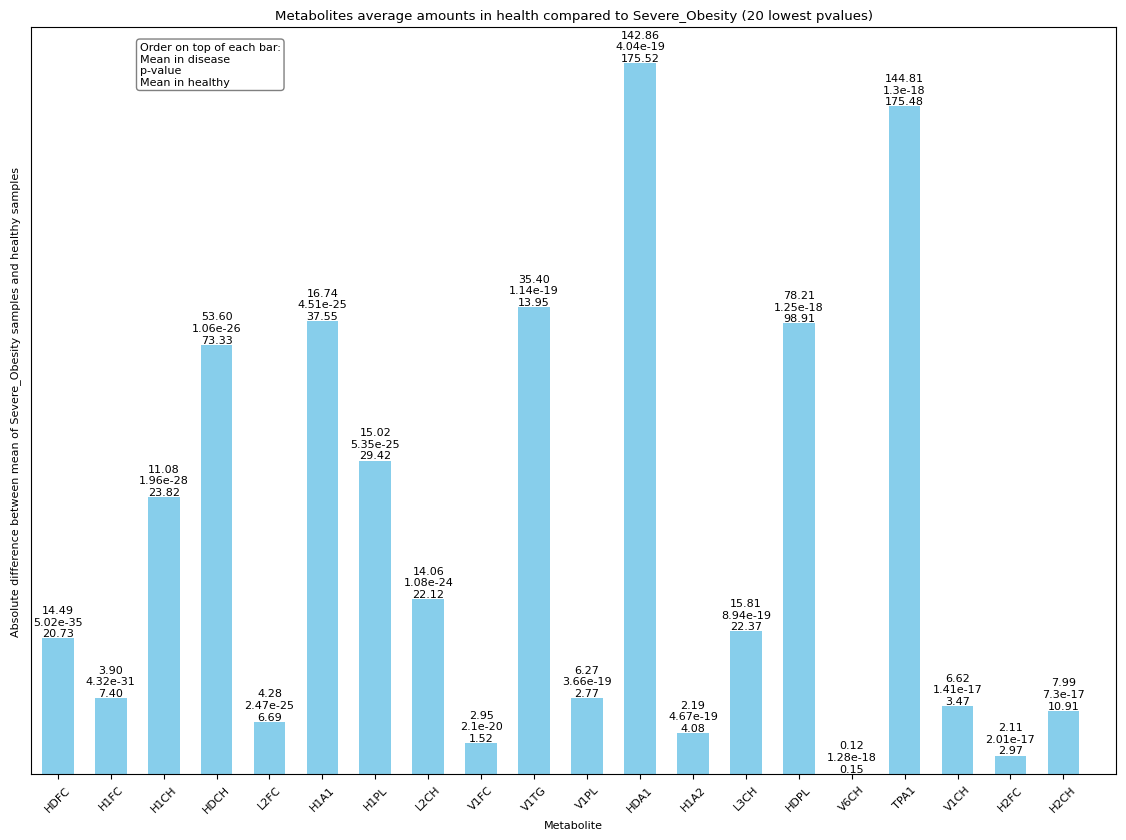

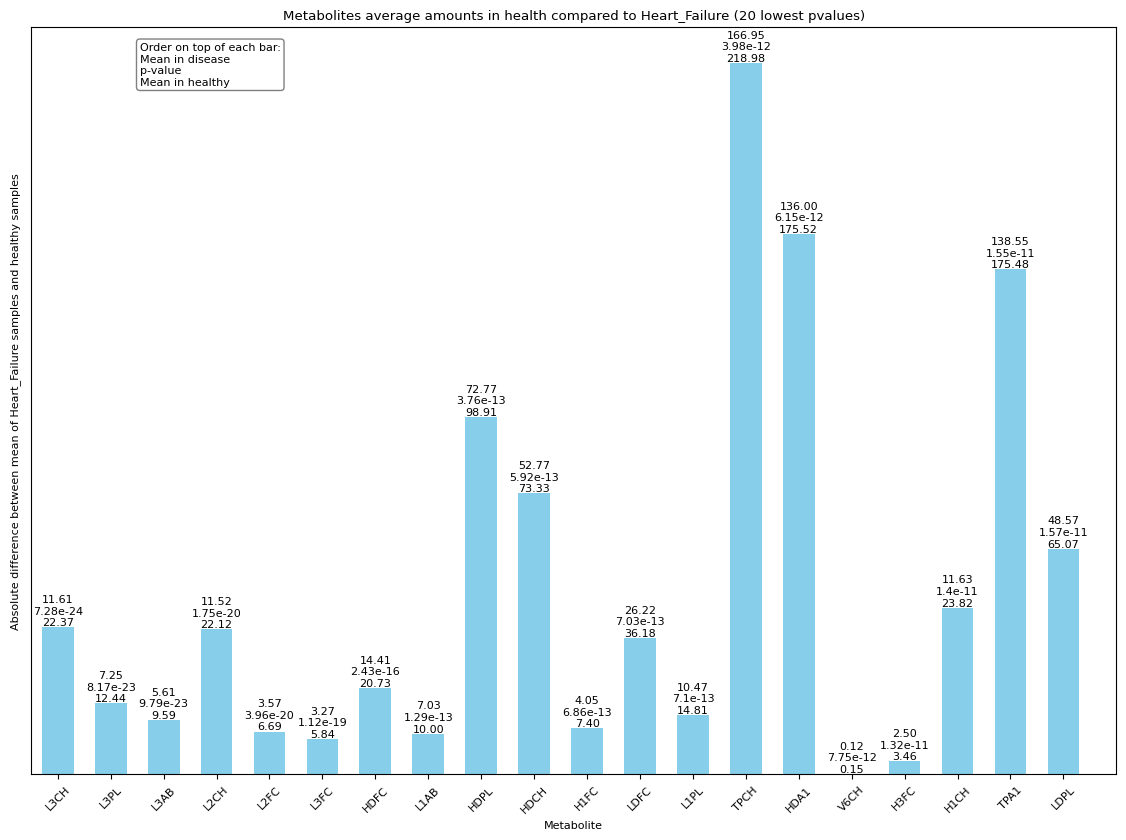

In [24]:
diseases = list(diseases_to_categories.keys())
healthy = metabolome_and_diseases_train[metabolome_and_diseases_train['PATGROUPFINAL_C'].isin(diseases_to_categories['Healthy'])]
for disease in diseases[:-1]:
    metabolites_in_disease = {'Metabolite':[], 'avg_amount':[],'pvalue':[],'pvalue-format':[]}
    x = metabolome_and_diseases_train[metabolome_and_diseases_train['PATGROUPFINAL_C'].isin(diseases_to_categories[disease])]
    for metabolite in metabolome_train.columns:
        t, pval = ttest_ind(healthy[metabolite], x[metabolite])
        metabolites_in_disease['Metabolite'].append(metabolite)
        metabolites_in_disease['avg_amount'].append(x[metabolite].mean())
        exponent = int(np.floor(np.log10(pval)))
        mantissa = round(pval / (10 ** exponent), 2)
        metabolites_in_disease['pvalue-format'].append(f"{mantissa}e{exponent}")
        metabolites_in_disease['pvalue'].append(pval)
    df = pd.DataFrame(metabolites_in_disease).rename({'avg_amount':'Average in '+disease,'pvalue':'pvalue in t-test with healthy'},axis=1).sort_values(by='pvalue in t-test with healthy')
    df = df.head(20)
    for met in df['Metabolite']:
        df.loc[df['Metabolite']==met,'In-Healthy'] = healthy[met].mean()
    df['abs_diff'] = (df['Average in ' + disease] - df['In-Healthy']).abs()
    fig, ax = plt.subplots(figsize=(14, 9.7))
    bars = ax.bar(df['Metabolite'], df['abs_diff'],color='skyblue',width=0.6,align='center')
    for bar, value, p, h in zip(bars, df['Average in '+disease], df['pvalue-format'], df['In-Healthy']):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{value:.2f}\n{p}\n{h:.2f}',
            ha='center', va='bottom',
            fontsize=8
        )
    ax.text(
        0.1, 0.98,
        "Order on top of each bar:\n"
        "Mean in disease\n"
        "p-value\n"
        "Mean in healthy",
        transform=ax.transAxes,
        fontsize=8,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray')
    )
    # Format plot
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df['Metabolite'], rotation=45)
    ax.tick_params(axis='y', which='both', length=0)
    ax.set_yticklabels([])
    ax.set_xlabel('Metabolite')
    ax.set_ylabel(f'Absolute difference between mean of {disease} samples and healthy samples')
    ax.set_title(f'Metabolites average amounts in health compared to {disease} (20 lowest pvalues)')
    # plt.tight_layout()
    ax.set_xlim(left=-0.5, right=len(df['Metabolite']) )
    plt.show()

In [25]:
def aupr_random_forest(train_data, train_labels, test_data, test_labels, plot_title):
    model = RandomForestClassifier()
    model.fit(train_data,train_labels)
    importances = model.feature_importances_
    gini_df = pd.DataFrame({'Feature': train_data.columns,'Gini Importance': importances}).sort_values(by='Gini Importance', ascending=False)
    labels_probs = model.predict_proba(test_data)[:, 1]
    confidence_df = pd.DataFrame({'Sample': test_data.index,'Confidence score': labels_probs}).sort_values(by='Confidence score', ascending=False)
    labels_pred = model.predict(test_data)
    precision, recall, thresholds = precision_recall_curve(test_labels, labels_probs)
    accuracy = accuracy_score(test_labels, labels_pred)
    aupr = auc(recall, precision)
    baseline = sum(test_labels) / len(test_labels)
    plt.figure(figsize=(8, 5))
    plt.plot(recall, precision, label=f'AUPR = {aupr:.4f}\nAccuracy = {accuracy:.4f}')
    plt.hlines(baseline, 0, 1, colors='r', linestyles='dashed', label=f'Baseline = {baseline:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve '+plot_title)
    plt.legend()
    plt.tight_layout()
    plt.show()
    return confidence_df, gini_df

In [26]:
microbiome_and_metabolome_train = pd.merge(metabolome_train, microbiome_train, left_index=True, right_index=True, how='inner')
microbiome_and_metabolome_test = pd.merge(metabolome_test, microbiome_test, left_index=True, right_index=True, how='inner')
metadata['Disease_status'] = metadata['PATGROUPFINAL_C'].apply(lambda x:0 if x == '8' else 1)
metadata['T2D'] = metadata['PATGROUPFINAL_C'].apply(lambda x:1 if x in diseases_to_categories['Type_2_Diabetes'] else 0)
metadata['CAD'] = metadata['PATGROUPFINAL_C'].apply(lambda x:1 if x in diseases_to_categories['Coronary_Artery_Disease'] else 0)
metadata['HF'] = metadata['PATGROUPFINAL_C'].apply(lambda x:1 if x in diseases_to_categories['Heart_Failure'] else 0)
metadata['SO'] = metadata['PATGROUPFINAL_C'].apply(lambda x:1 if x in diseases_to_categories['Severe_Obesity'] else 0)
metadata['MS'] = metadata['PATGROUPFINAL_C'].apply(lambda x:1 if x in diseases_to_categories['Metabolic_Syndrome'] else 0)
metadata_train = metadata.loc[train_idx]
metadata_test = metadata.loc[test_idx]

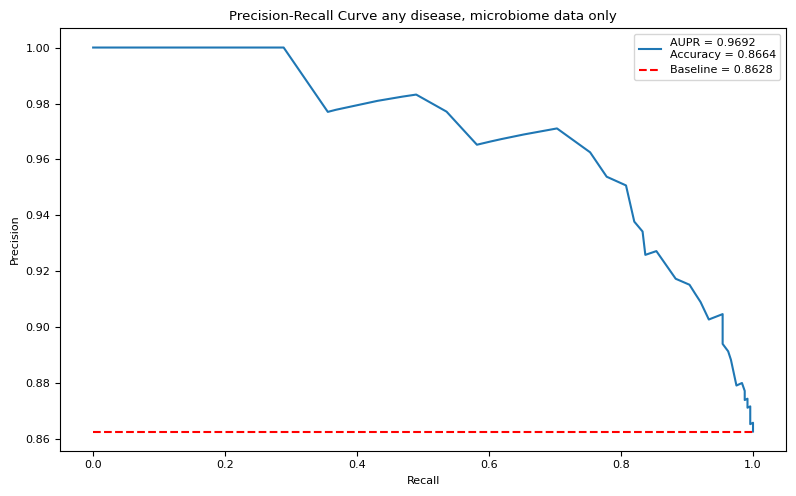

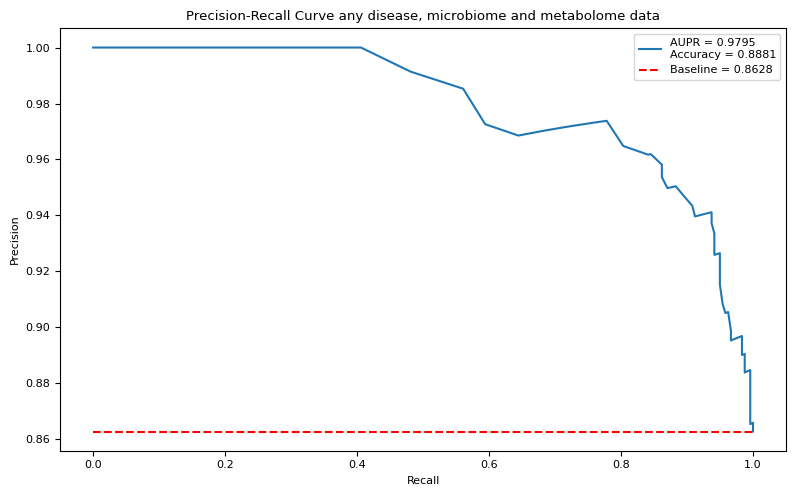

In [27]:
# classifying sick/healthy for any disease
x = aupr_random_forest(microbiome_train, metadata_train['Disease_status'],microbiome_test, metadata_test['Disease_status'], 'any disease, microbiome data only')
y = aupr_random_forest(microbiome_and_metabolome_train, metadata_train['Disease_status'],microbiome_and_metabolome_test,metadata_test['Disease_status'], 'any disease, microbiome and metabolome data')
x[1].to_csv("first_gini_rf_microonly.csv",index=False)
y[1].to_csv("first_gini_rf_micrometbole.csv",index=False)
x[0].to_csv("first_conf_rf_microonly.csv",index=False)
y[0].to_csv("first_conf_rf_micrometbole.csv",index=False)

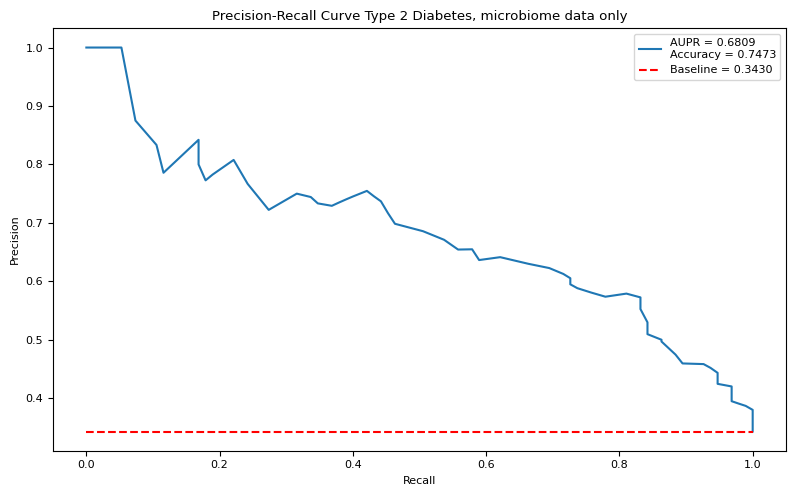

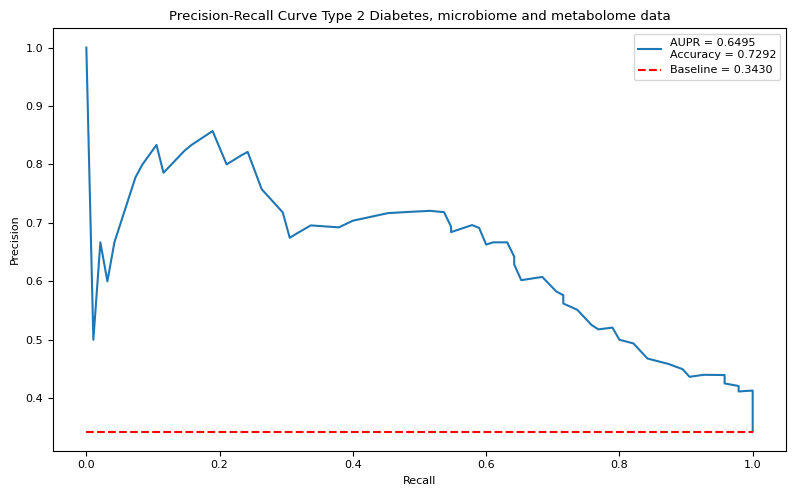

(         Sample  Confidence score
 266  x20MCx3211              0.74
 17   x10MCx1144              0.74
 140  x30MCx2364              0.73
 254  x20MCx1952              0.72
 36   x20MCx2737              0.72
 ..          ...               ...
 149  x30MCx2982              0.05
 207  x30MCx2281              0.05
 41   x30MCx1525              0.05
 7    x30MCx2081              0.03
 197  x14MCx1313              0.03
 
 [277 rows x 2 columns],
                      Feature  Gini Importance
 652  Escherichia sp001660175         0.014209
 653     Escherichia marmotae         0.012699
 648   Escherichia fergusonii         0.011724
 647  Escherichia sp004211955         0.010719
 646  Escherichia sp002965065         0.010264
 ..                       ...              ...
 428      CAG-314 sp000437915         0.000200
 523  Phocaeicola sp011959205         0.000188
 675      CAG-533 sp000434495         0.000183
 669      CAG-313 sp003539625         0.000129
 439      CAG-475 sp000434435       

In [28]:
# random forest for t2d
aupr_random_forest(microbiome_train, metadata_train['T2D'], microbiome_test, metadata_test['T2D'], 'Type 2 Diabetes, microbiome data only')
aupr_random_forest(microbiome_and_metabolome_train, metadata_train['T2D'], microbiome_and_metabolome_test, metadata_test['T2D'], 'Type 2 Diabetes, microbiome and metabolome data')

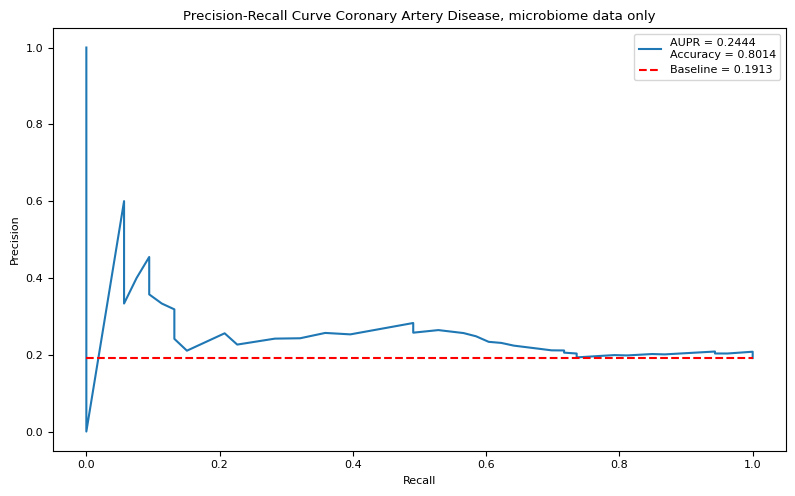

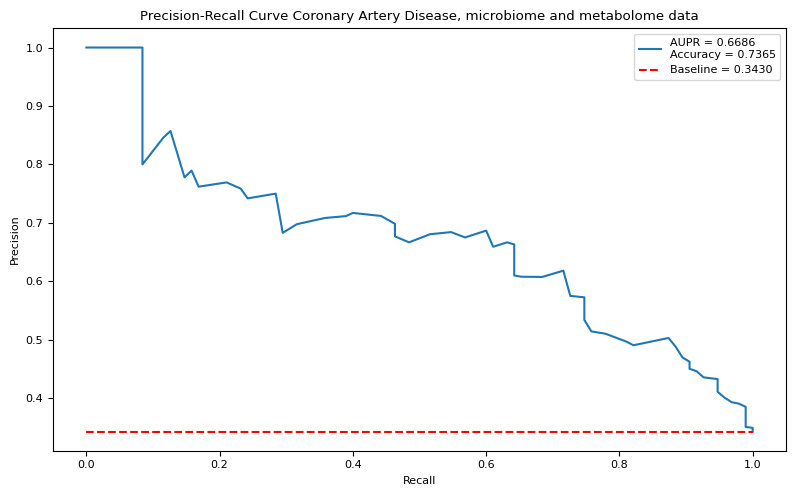

(         Sample  Confidence score
 129  x10MCx2627              0.73
 266  x20MCx3211              0.72
 140  x30MCx2364              0.70
 47   x10MCx2332              0.69
 257  x10MCx2012              0.68
 ..          ...               ...
 78   x20MCx1332              0.04
 217  x30MCx2851              0.04
 194  x30MCx3382              0.03
 88   x30MCx3137              0.02
 7    x30MCx2081              0.02
 
 [277 rows x 2 columns],
                      Feature  Gini Importance
 650  Escherichia sp005843885         0.015454
 646  Escherichia sp002965065         0.011925
 654     Escherichia albertii         0.010374
 653     Escherichia marmotae         0.009397
 645         Escherichia coli         0.009395
 ..                       ...              ...
 439      CAG-475 sp000434435         0.000167
 320   Coprococcus eutactus_A         0.000158
 426        PeH17 sp000435055         0.000104
 105       CAG-83 sp900552725         0.000062
 275      UBA1206 sp000433115       

In [29]:
# random forest for cad
aupr_random_forest(microbiome_train,metadata_train['CAD'], microbiome_test, metadata_test['CAD'], 'Coronary Artery Disease, microbiome data only')
aupr_random_forest(microbiome_and_metabolome_train, metadata_train['T2D'], microbiome_and_metabolome_test, metadata_test['T2D'], 'Coronary Artery Disease, microbiome and metabolome data')

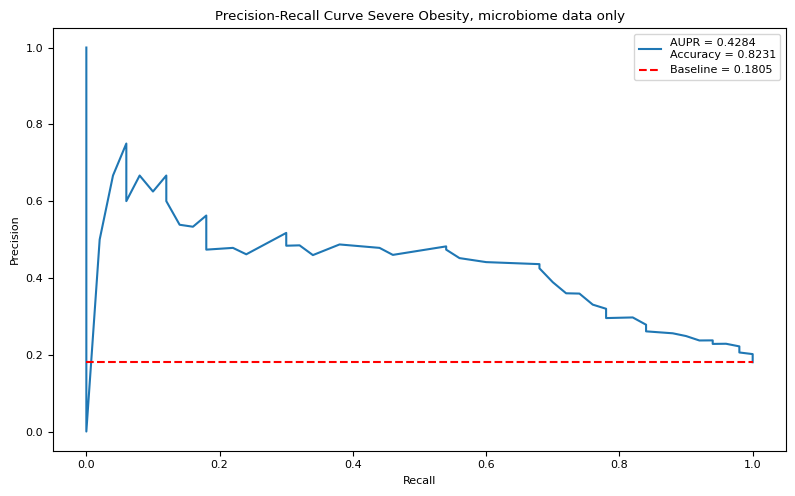

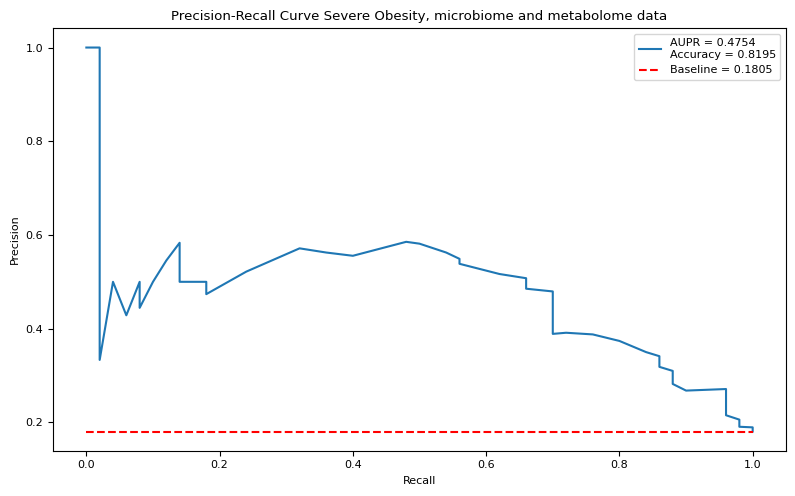

(         Sample  Confidence score
 122  x20MCx3138              0.68
 160  x11MCx2290              0.60
 220  x30MCx3186              0.56
 186  x20MCx1233              0.55
 76   x20MCx2581              0.53
 ..          ...               ...
 163  x30MCx3291              0.03
 164  x20MCx1620              0.02
 242  x30MCx2662              0.02
 194  x30MCx3382              0.01
 7    x30MCx2081              0.00
 
 [277 rows x 2 columns],
                              Feature  Gini Importance
 53                              L4PL         0.006239
 50                              L4AB         0.006066
 159  Scatomorpha intestinigallinarum         0.005196
 649              Escherichia ruysiae         0.005002
 450              CAG-273 sp003534295         0.004492
 ..                               ...              ...
 634      Scatacola_A faecigallinarum         0.000191
 711            Bilophila wadsworthia         0.000185
 236              UBA1394 sp900066845         0.000155
 42

In [30]:
# random forest for so
aupr_random_forest(microbiome_train, metadata_train['SO'], microbiome_test, metadata_test['SO'], 'Severe Obesity, microbiome data only')
aupr_random_forest(microbiome_and_metabolome_train, metadata_train['SO'], microbiome_and_metabolome_test, metadata_test['SO'], 'Severe Obesity, microbiome and metabolome data')

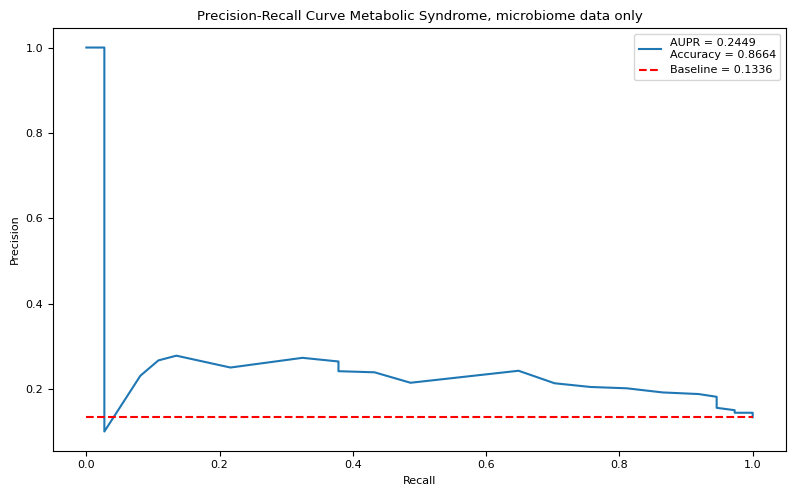

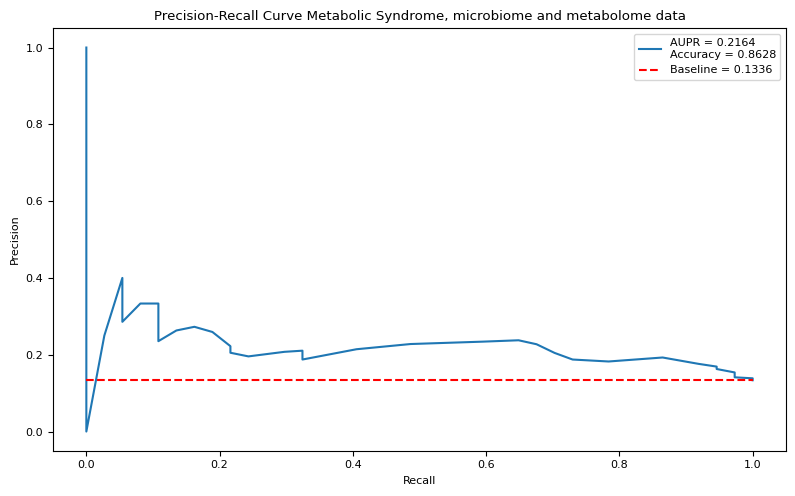

(         Sample  Confidence score
 128  x30MCx2734              0.52
 250  x30MCx1786              0.43
 249  x30MCx2919              0.40
 72   x30MCx1116              0.40
 38   x13MCx2963              0.38
 ..          ...               ...
 160  x11MCx2290              0.03
 43   x20MCx1470              0.03
 192  x10MCx2707              0.02
 132  x30MCx1401              0.02
 95   x30MCx3143              0.00
 
 [277 rows x 2 columns],
                           Feature  Gini Importance
 57                           L5FC         0.007213
 52                           L4FC         0.006550
 55                           L5AB         0.006077
 306     Eubacterium_F sp000433735         0.005876
 58                           L5PL         0.005674
 ..                            ...              ...
 703  Bifidobacterium adolescentis         0.000144
 488            Bacteroides fluxus         0.000129
 741            Holdemanella porci         0.000127
 461           CAG-452 sp00043403

In [31]:
# random forest for ms
aupr_random_forest(microbiome_train, metadata_train['MS'], microbiome_test, metadata_test['MS'], 'Metabolic Syndrome, microbiome data only')
aupr_random_forest(microbiome_and_metabolome_train, metadata_train['MS'], microbiome_and_metabolome_test, metadata_test['MS'], 'Metabolic Syndrome, microbiome and metabolome data')

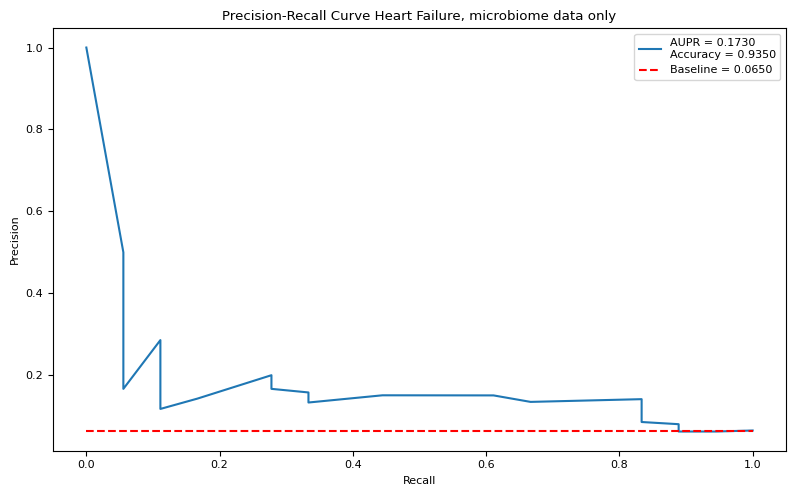

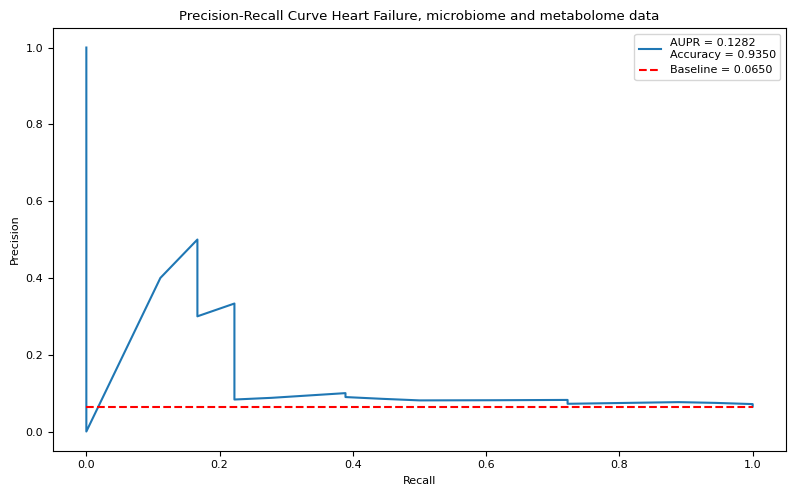

(         Sample  Confidence score
 226  x14MCx2903              0.37
 19   x30MCx2080              0.29
 221  x30MCx2116              0.27
 93   x30MCx1688              0.27
 195  x12MCx2993              0.27
 ..          ...               ...
 122  x20MCx3138              0.00
 152  x10MCx3317              0.00
 199  x20MCx2787              0.00
 216  x20MCx3109              0.00
 276  x10MCx2520              0.00
 
 [277 rows x 2 columns],
                                 Feature  Gini Importance
 257  Anaeromassilibacillus stercoravium         0.009268
 429            Limiplasma merdipullorum         0.009266
 618              Butyricimonas faecalis         0.008808
 223           Anaerotruncus colihominis         0.007310
 12                                 H3A1         0.007076
 ..                                  ...              ...
 568              Prevotella sp900543975         0.000000
 69                                 LDTG         0.000000
 327             Lachnospira sp

In [32]:
# random forest for HF
aupr_random_forest(microbiome_train, metadata_train['HF'], microbiome_test, metadata_test['HF'], 'Heart Failure, microbiome data only')
aupr_random_forest(microbiome_and_metabolome_train, metadata_train['HF'], microbiome_and_metabolome_test, metadata_test['HF'], 'Heart Failure, microbiome and metabolome data')